# <a href="https://mipt-stats.gitlab.io/courses/mathstat_bmhf.html">Математическая статистика (ФБМФ, ФМХФ)</a>
## Домашнее задание 1 &mdash; часть A

**Правила:**

* Выполненную работу нужно отправить телеграм-боту `@miptstats_st22_bot`. Для начала работы с ботом каждый раз отправляйте `/start`. Работы, присланные иным способом, не принимаются.
* Дедлайн см. в боте. После дедлайна работы не принимаются **вообще никак**, кроме случаев наличия уважительной причины.
* До дедлайна можно поменять решение любое количество раз. Начинайте точно так же сдавать задание, бот подскажет.
* Любую уважительную причину нужно подтвердить документально, отправив скан или фото боту. При этом работу можно сдать позже на столько дней, на сколько время ее действия пересекается с временем выполнения задания.
* Прислать нужно **ноутбук в формате ipynb**.
* Выполнять задание необходимо **полностью самостоятельно**. При обнаружении списывания **все участники списывания будут сдавать устный зачет.**
* Решения, размещенные на каких-либо интернет-ресурсах не принимаются. Кроме того, публикация решения в открытом доступе может быть приравнена к предоставлении возможности списать.
* Простой или основной уровень вы выбираете самостоятельно, выполняя или не выполняя задания типа B. При выборе **простого уровня** достаточно выполнить задания *типа A*. При выборе **основного уровня** нужно выполнять *как задания типа A, так и задания типа B*.
* Для выполнения задания используйте этот ноутбук в качествие основы, ничего не удаляя из него. Можно добавлять необходимое количество ячеек. Ячейки с assert'ами **удалять и изменять нельзя**, в противном случае соответствующее задание не будет оценено.
* Комментарии к решению пишите в markdown-ячейках.
* **Если код студента не выполнен, недописан и т.д., то он не оценивается.**
* Каждая задача стоит **5 баллов**.

<font size="5">Для выполнения задания используйте этот ноутбук в качествие основы, ничего не удаляя из него. Можно добавлять необходимое количество ячеек. Ячейки с assert'ами <b>удалять и изменять нельзя</b>, в противном случае соответствующее задание не будет оценено.</font>

In [6]:
import numpy as np
import scipy.stats as sps
import matplotlib.pyplot as plt
from scipy.special import factorial, gammaln

In [7]:
import math

### Задача 1.1

Пусть $X_1, ..., X_n$ &mdash; выборка пуассоновского распределения $Pois(\theta)$, то есть $\mathsf{P}(X_i = k) = \frac{\theta^k}{k!} e^{-\theta}$ при $k \in \{0, 1, 2, ...\}$.
Реализуйте функции, вычисляющие:
* логарифм правдоподобия;
* градиент логарифма правдоподобия;
* оценку $\theta$ по методу максимального правдоподобия.

_Замечание: функция вычисления логарифма факториала уже реализована ниже_

In [8]:
def logfactorial(x):
    return gammaln(x + 1)

Взяли логарифм от функции вероятности

In [9]:
def poiss_loglikelihood(x, theta):
    return math.log(np.prod(pow(theta, x)/factorial(x) * math.exp(-theta)))

In [10]:
x = np.array([1, 2, 3])
assert round(poiss_loglikelihood(x, 1.9), 2) == -4.33
assert poiss_loglikelihood(x, 1.9) > poiss_loglikelihood(x, 4.2)

Отдельно посчитали производную логарифма и сложили их всех

In [11]:
def poiss_loglikelihood_grad(x, theta):
    return np.sum(x/theta - 1)

In [12]:
x = np.array([1, 2, 3])
assert round(poiss_loglikelihood_grad(x, 1.9), 2) == 0.16



```
∑ (x_i/θ - 1) = 0 - условие экстремума
∑ x_i/θ = n, где n длина x
(∑ x_i)/n = θ
```



In [13]:
def poiss_maxlikelihood_estimator(x):
    return np.mean(x)

In [14]:
x = np.array([1, 2, 3])
theta = poiss_maxlikelihood_estimator(x)
assert np.allclose(poiss_loglikelihood_grad(x, theta), 0)
assert np.allclose(poiss_maxlikelihood_estimator(x), 2)

### Задача 1.2

Дана выборка $X_1, ..., X_n$ из нормального распределения $\mathcal{N}(a, \sigma^2)$. Реализуйте функции, вычисляющие:
* логарифм правдоподобия для параметра $\theta = (a, \sigma)$;
* градиент логарифма правдоподобия $\theta$;
* оценку $\theta$ по методу максимального правдоподобия.

In [15]:
def norm_distrib(x, a, sigma):
  return 1/(sigma * pow(2 * math.pi, 1/2)) * np.exp(-1/2*np.power((x-a)/sigma,2))

In [16]:
def norm_loglikelihood(x, a, sigma):
    return math.log(np.prod(norm_distrib(x, a, sigma)))

In [17]:
x = np.array([1, 2, 3])
assert round(norm_loglikelihood(x, 0, 1), 2) == -9.76
assert norm_loglikelihood(x, 0, 1) < norm_loglikelihood(x, 1, 1)
assert norm_loglikelihood(x, 0, 1) > norm_loglikelihood(x, 0, 100)

In [18]:
def norm_loglikelihood_grad(x, a, sigma):
    return [np.sum((x-a)/sigma**2) ,np.sum((a**2 -2*a*x-sigma**2+x**2)/sigma**3)]

In [19]:
x = np.array([1, 2, 3])
assert np.allclose(norm_loglikelihood_grad(x, 1.9, 3), [0.03, -0.92], atol=0.01)

In [20]:
def norm_maxlikelihood_estimator(x):
    a = np.mean(x)
    return [a, np.mean(np.power(a**2 - 2*a*np.mean(x) + np.mean(x**2), 1/2))]

In [21]:
x = np.array([1, 2, 3])
a, sigma = norm_maxlikelihood_estimator(x)
assert np.allclose(norm_loglikelihood_grad(x, a, sigma), 0)
assert np.allclose([a, sigma], [2.00, 0.82], atol=0.01)

---

__________________
### Задача 2.1
Даны 6 параметрических моделей &mdash; для каждой нужно реализовать подсчёт функции правдоподобия по небольшой выборке, чтобы затем построить график функции правдоподобия.

*a).* Параметрическая модель $\mathcal{N}(\theta, 1)$.

*b).* Параметрическая модель $Exp(\theta)$.

*c).* Параметрическая модель $U[0, \theta]$.

*d).* Параметрическая модель $Bin(5, \theta)$.

*e).* Параметрическая модель $Pois(\theta)$.

*f).* Параметрическая модель $Сauchy(\theta)$, где $\theta$ — параметр сдвига.

In [22]:
def calc_likelihood(dist_name, theta_grid, sample):
    theta_grid = theta_grid.reshape((-1, 1))
    sample = sample.reshape((1, -1))

    if dist_name == "normal":
        return sps.norm(loc=theta_grid).pdf(sample).prod(axis=1)
    elif dist_name == "expon":
        return (sps.expon(scale = theta_grid).pdf(sample)).prod(axis=1)
    elif dist_name == "uniform":
        return sps.uniform(0, theta_grid).pdf(sample).prod(axis=1)
    elif dist_name == "binomial":
        return sps.binom(5, theta_grid).pmf(sample).prod(axis=1)
    elif dist_name == "poisson":
        return sps.poisson.pmf(sample, mu = theta_grid).prod(axis=1)
    elif dist_name == "cauchy":
        return sps.cauchy(loc=theta_grid).pdf(sample).prod(axis=1)

    assert False

In [23]:
check_values = {
 'normal': {'sample': [-1, 1], 'theta': [1.0, 2.0], 'likelihood': [0.0215, 0.0011]},
 'expon': {'sample': [1, 2], 'theta': [6.0, 7.0], 'likelihood': [0.0168, 0.0133]},
 'uniform': {'sample': [0.2, 0.8], 'theta': [1.8, 2.1], 'likelihood': [0.3086, 0.2268]},
 'binomial': {'sample': [5, 5], 'theta': [0.6, 0.7], 'likelihood': [0.006, 0.0282]},
 'poisson': {'sample': [5, 10], 'theta': [6.04, 7.03], 'likelihood': [0.0068, 0.0091]},
 'cauchy': {'sample': [-0.5, 0.5], 'theta': [1.0, 2.0], 'likelihood': [0.0249, 0.0043]}
}
for dist_name, params in check_values.items():
    ans = calc_likelihood(dist_name, np.array(params["theta"]), np.array(params["sample"]))
    ref = np.array(params["likelihood"])
    assert ans.shape == ref.shape
    assert np.allclose(ans, ref, atol=1e-4)

Посмотрим на графики функций правдоподобия:

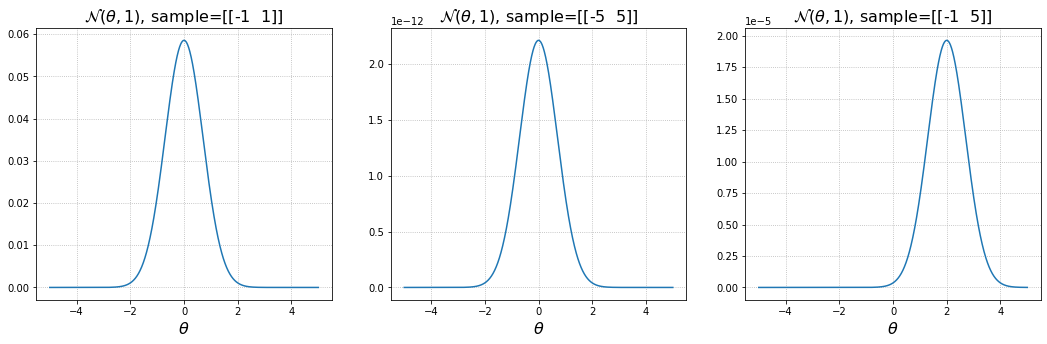

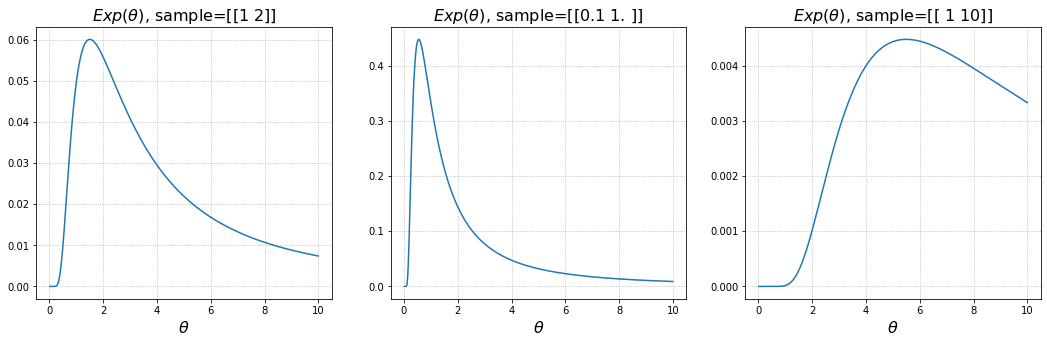

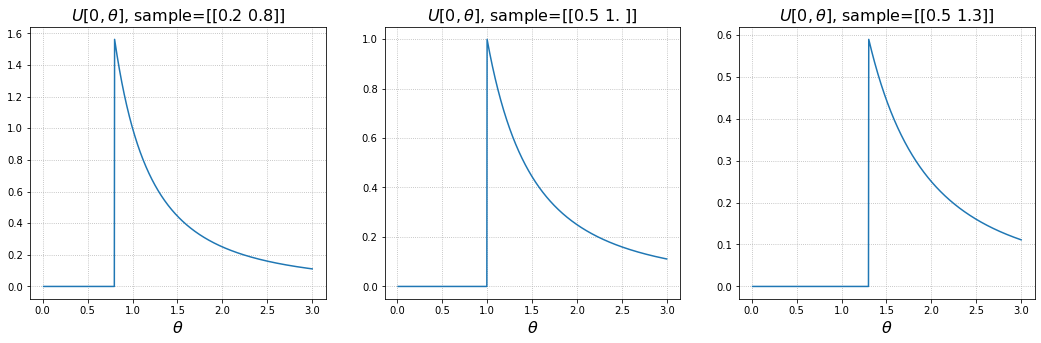

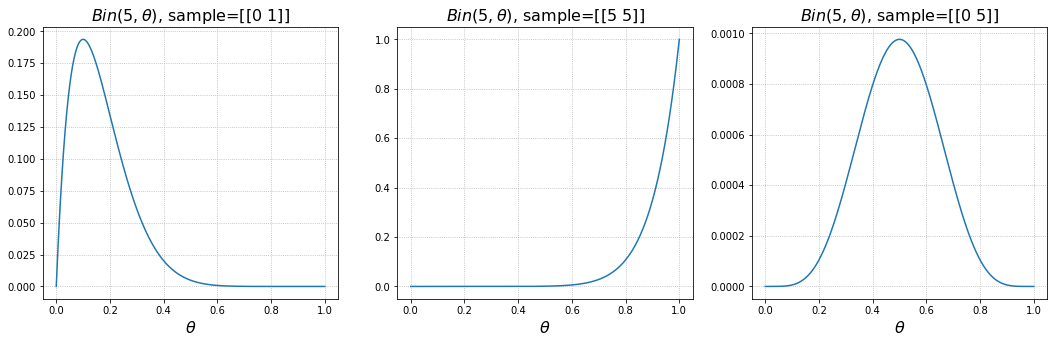

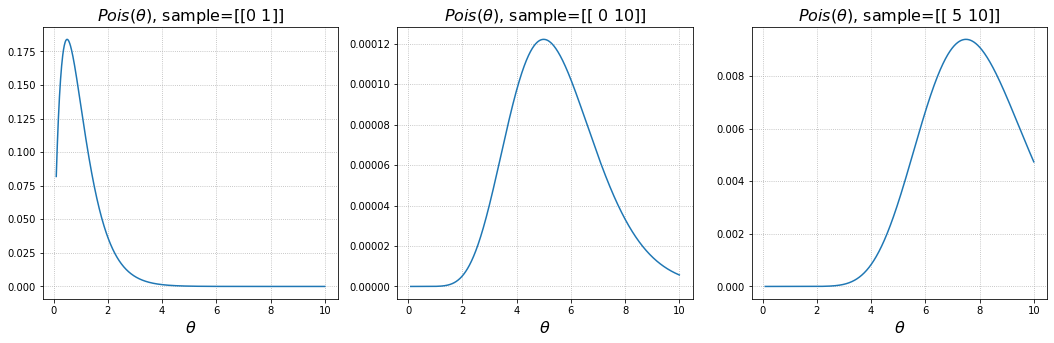

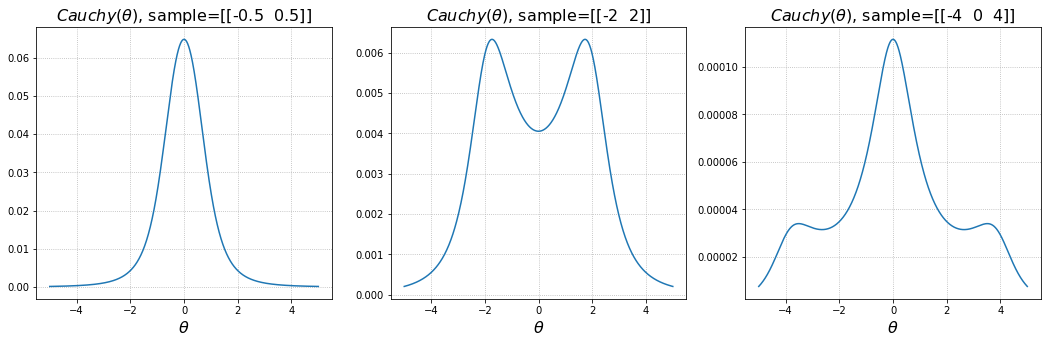

In [24]:
dist2samples = {
    "normal":   [[-1, 1], [-5, 5], [-1, 5]],
    "expon":    [[1, 2], [0.1, 1], [1, 10]],
    "uniform":  [[0.2, 0.8], [0.5, 1], [0.5, 1.3]],
    "binomial": [[0, 1], [5, 5], [0, 5]],
    "poisson":  [[0, 1], [0, 10], [5, 10]],
    "cauchy":   [[-0.5, 0.5], [-2, 2], [-4, 0, 4]],
}
dist2grid = {
    "normal":   np.linspace(-5, 5, 1000),
    "expon":    np.linspace(0.01, 10, 1000),
    "uniform":  np.linspace(0.01, 3, 1000),
    "binomial": np.linspace(0, 1, 1000),
    "poisson":  np.linspace(0.1, 10, 1000),
    "cauchy":   np.linspace(-5, 5, 1000),
}
dist2label = {
    "normal":   r"$\mathcal{N}(\theta, 1)$",
    "expon":    r"$Exp(\theta)$",
    "uniform":  r"$U[0, \theta]$",
    "binomial": r"$Bin(5, \theta)$",
    "poisson":  r"$Pois(\theta)$",
    "cauchy":   r"$Сauchy(\theta)$",
}

for dist_name in dist2samples.keys():
    label = dist2label[dist_name]

    plt.figure(figsize=(18, 5))
    grid = dist2grid[dist_name]
    for i, sample in enumerate(dist2samples[dist_name]):
        sample = np.array(sample).reshape((1, -1))
        likelihood = calc_likelihood(dist_name, grid, sample)

        plt.subplot(1, 3, i+1)
        plt.plot(grid, likelihood)
        plt.xlabel('$\\theta$', fontsize=16)
        plt.grid(ls=':')
        plt.title(label + ', sample=' + str(sample), fontsize=16)
    plt.show()

Сделайте вывод о том, как функция правдоподобия для каждой модели зависит от выборки.

**Вывод:**

Для нормальной выборки параметры влияют на смещение и на максимум. 

У экспонциальной параметры влияют на угол наклона и так же на максимум.

Аналогично у юниформальной.

У биноминальной влияет на сдвиг и на максимум.

Аналогично в Пуассоновском.

В Cauchy влияет на количество максимумом и на все раннее перечисленные признаки.


Является ли функция правдоподобия плотностью? Имеет ли она единственный максимум? Дайте ответы на эти вопросы в переменных следующей ячейке, записав в соответствующую переменную либо название распределения, для которого это свойство не выполняется, либо `None`, если свойство верно всегда.

In [25]:
non_density = "binomial"
non_single_maximum = "cauchy"

Здесь было место, чтобы написать мое решение, но его особо нет: по графикам видно, что у Cauchy может быть больше одного максимума. А Биномиальное распредление - дискретное, поэтому там не плоность вероятности


In [26]:
assert non_density in [None, 'normal', 'expon', 'uniform', 'binomial', 'poisson', 'cauchy']
assert non_single_maximum in [None, 'normal', 'expon', 'uniform', 'binomial', 'poisson', 'cauchy']
# А тут скрытые assert'ы :)

### Задача 2.2

Дана функция, которая по выборке $(X_1, \ldots, X_n)$ и двум числам $\mu_0, \mu_1$ определяет, какое из двух распределений &mdash; $\mathcal{N}(\mu_0, 1)$ или $\mathcal{N}(\mu_1, 1)$ &mdash; более точно описывает выборку, путём сравнения функций правдоподобия:

In [27]:
def select(x, u0, u1):
    prob0 = sps.norm(loc=u0).pdf(x).prod()
    prob1 = sps.norm(loc=u1).pdf(x).prod()
    if prob0 > prob1:
        return 0
    else:
        return 1

Пример работы для выборки размера 30 из $\mathcal{N}(0.1, 1)$:

In [247]:
np.random.seed(1)

In [255]:
select(sps.norm(loc=0.1).rvs(30), u0=0, u1=1)

8.474445174426108e-19 3.8570256995396326e-23


0

In [256]:
select(sps.norm(loc=0.1).rvs(30), u0=1, u1=0)

2.152847466395119e-28 4.865807513415026e-23


1

Однако она некорректно работает для выборок большого размера:

In [253]:
select(sps.norm(loc=0.1).rvs(1000), u0=0, u1=1) # returns 1

0.0 0.0


1

In [254]:
select(sps.norm(loc=0.1).rvs(1000), u0=1, u1=0) # returns 0

0.0 0.0


1

Почему такое происходит?

**Ответ:**

Так как числа получаются очень маленькие(близкие к 0), то код их начинает воспринимать как 0. То есть оба значения равны 0, поэтому всегда ответ будет выводить 1.



Напишите исправленную версию функции, которая также выбирает подходящий параметр на основе значения правдободобия, но работает и для выборок большого размера.

_Подсказка: обратите внимание на значения функций правдоподобия при маленькой и большой выборке. Нужно использовать некоторый метод класса `sps.norm`._

In [30]:
def select_fixed(x, u0, u1):
    prob0 = sps.norm(loc=u0).logpdf(x).prod()
    prob1 = sps.norm(loc=u1).logpdf(x).prod()
    if prob0 > prob1:
        return 1
    else:
        return 0

In [31]:
x = sps.norm(loc=0.1).rvs(1000)
assert select_fixed(x, u0=0, u1=1) == 0
assert select_fixed(x, u0=1, u1=0) == 1

### Задача 3
В этой задаче нужно визуально проверить *свойство состоятельности*.

Пусть $X_1, ..., X_n$ &mdash; выборка из распределения $U(0, \theta)$.

Рассмотрим 5 оценок $\theta$:
- $\widehat{\theta}_a = 2\overline{X}$
- $\widehat{\theta}_b = \max_i X_i$
- $\widehat{\theta}_c = 2\sqrt{\overline{X^2}}$
- $\widehat{\theta}_d = \sqrt{3\overline{X^2}}$
- $\widehat{\theta}_e = (n - 1) \min_i X_i$

Дано множество выборок $X^1, \dots, X^{300}$ из распределения $U[0, 1]$:  $\; X^j = (X^j_1, \dots, X^j_{500}), 1 \leqslant j \leqslant 300$.
<br>
По каждой из них посчитайте оценки
$\widehat{\theta}_{a,jn} = 2\frac{X^j_1 + \dots + X^j_n}{n}$,
$\widehat{\theta}_{b,jn} = \max(X^j_1, \dots, X^j_n)$,
$\widehat{\theta}_{c,jn} = 2 \cdot \sqrt{\frac{\sum_{i=1}^n {X_{ji}^2}}{n}}$ и т.д.,
для $1 \leqslant n \leqslant 500$,  то есть оценки параметра $\theta$ по первым $n$ наблюдениям $j$-й выборки. При написании кода могут помочь функции `numpy.cumsum(axis=...)` и `np.maximum.accumulate(axis=...)`.

In [32]:
x = sps.uniform().rvs((300, 500))
estimations = [
    2* np.cumsum(x, axis = 1) / np.arange(1, 501),
    np.maximum.accumulate(x, axis = 1),
    2 * np.power(np.cumsum(np.square(x), axis = 1), 1/2),
    np.power(3*np.cumsum(np.square(x), axis = 1), 1/2),
    np.minimum.accumulate(x, axis = 1) * np.arange(2, 502)
]
for i in range(300):
  for j in range(500):
    estimations[2][i][j] *= np.power(1/(j + 1), 1/2)
for i in range(300):
  for j in range(500):
    estimations[3][i][j] *= np.power(1/(j + 1), 1/2)

In [33]:
assert np.allclose(estimations[0][42, 1], 2 * (x[42, 0] + x[42, 1]) / 2)
assert np.allclose(estimations[1][42, 1], max(x[42, 0], x[42, 1]))
assert np.allclose(estimations[2][42, 1], 2 * ((x[42, 0]**2 + x[42, 1]**2) / 2)**0.5)
assert np.allclose(estimations[3][42, 1], (3 * (x[42, 0]**2 + x[42, 1]**2) / 2)**0.5)
assert np.allclose(estimations[4][42, 1], 3 * min(x[42, 0], x[42, 1]))
assert len(estimations) == 5
assert all(estimations[i].shape == (300, 500) for i in range(5))

Для каждой оценки $\theta^*, \widehat{\theta}$ нарисуйте следующий график. Для каждого $j$ нанесите на один график зависимости $\theta^*_{jn}$ или $\widehat{\theta}_{jn}$ от $n$ с помощью `plt.plot`. Каждая кривая должна быть нарисована *одним цветом* с прозрачностью `alpha=0.05`. Поскольку при малых $n$ значения средних могут быть большими по модулю, ограничьте область графика по оси *y* с помощью функции `plt.ylim((min, max))`.

In [34]:
def get_mean(est, j):
  n = len(est[0][j])
  ans = np.zeros(n)
  for i in range(n):
    sm = 0
    for t in range(5):
      sm += est[t][j][i]
    ans[i] = sm/5
  return ans

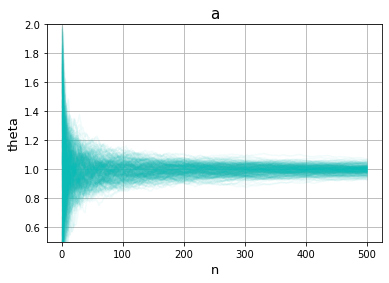

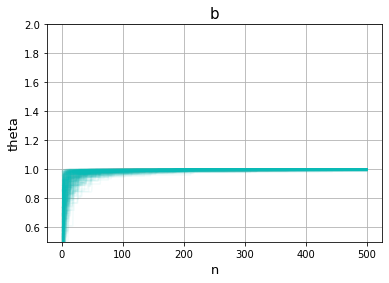

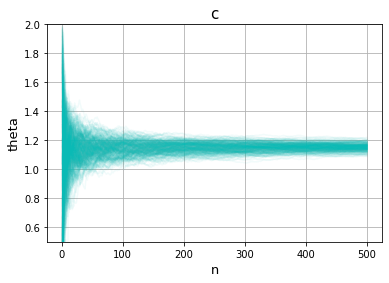

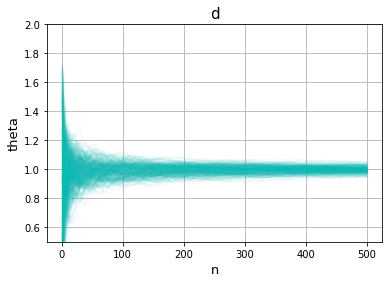

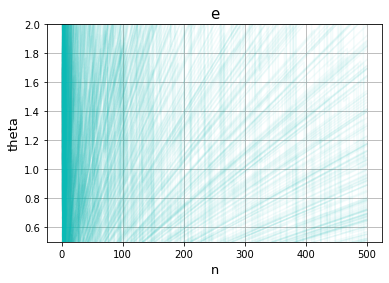

In [35]:
for u in range(5):
  fig = plt.figure(1)	
  plt.title("", fontsize='16')
  for j in range(300):
    plt.plot(np.arange(500) + 1, estimations[u][j], alpha = 0.05, color = "#0abab5")
  plt.title(chr(u + 97), fontsize = '15')	
  plt.xlabel("n",fontsize='13')
  plt.ylabel("theta",fontsize='13')	
  plt.ylim((0.5, 2))
  plt.grid()
  plt.show()


Укажите, для каких оценок, судя по графику, наблюдается свойство состоятельности:

In [36]:
consistent_estimators = {"a", "b", "c", "d"}
... # Ваше решение тут

In [37]:
assert isinstance(consistent_estimators, set)
assert consistent_estimators <= {"a", "b", "c", "d", "e"}
# А тут скрытые assert'ы :)